In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [2]:
#Sort the data
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
#IMPORT DATA
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.keys()
    dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details',
    'categories', 'url'])
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

NameError: name 'dict_keys' is not defined

In [10]:
X, y = mnist["data"], mnist["target"]
print(X.shape) #70000 images of size 28x28 pixels, each ranging from 0 (white) to 255 (black)
y.shape #labels 

(70000, 784)


(70000,)

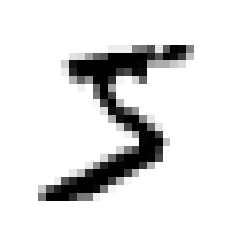

'5'

In [11]:
#PLOTTING THE DATA AS AN IMAGE
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(X[0].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()
y[0]

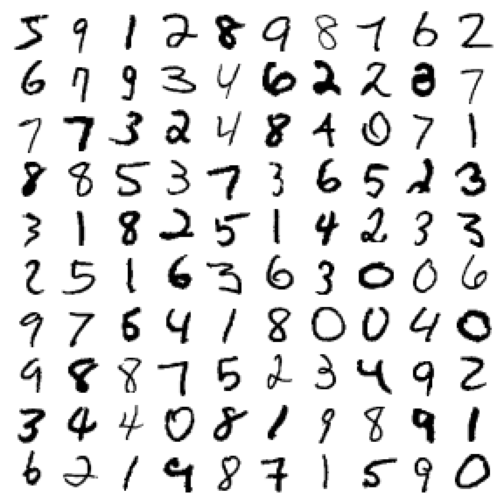

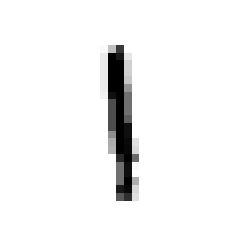

In [12]:
#Plotting function
def plot_digit(data): #PLOTS ONE ITEM
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
def plot_digits(instances, images_per_row=10, **options): #PLOTS 
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]] #concatenate the images
plot_digits(example_images, 10)
plt.show()
plot_digit(X[8])

In [ ]:
# The number 5 was printed as a string, we can convert it into an integer as
y=y.astype(np.uint8)
y[0]

In [13]:
# creating training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# the data already came prepared (shuffled) into test (last 10000 (60000:)) and train (first 60000 (:60000)) 

In [ ]:
#training to recognize the number 5
y_test_5 = (y_test == 5)
y_train_5 = (y_train == 5)

In [ ]:
#Stochastic Gradient Descent (SGD) method
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [50]:
# guesses, rightly, that X1 is not 5 and that X0 is 5
sgd_clf.predict([X_test[0]])

array([False])

In [4]:
#this function splits the test set into CV=3 cross validation sets and calcultates the accuray com the precictions
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

NameError: name 'sgd_clf' is not defined

In [5]:
#this result looks good, but in reality it is not that great, as the random number has only 1 in 10 chance of being a 5 (10%)
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy", n_jobs=-1)

NameError: name 'X_train' is not defined

In [6]:
#to fix this issue we should look at the CONFUSION MATRIX
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

NameError: name 'sgd_clf' is not defined

In [7]:
#this matrix gives us number of true negatives (0,0), false positives (0,1), false negatives (1,0) and true negatives (1,1)
#the non diagonal terms are the worng predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

NameError: name 'y_train_5' is not defined

In [8]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred) ) #PRECISION: probability of a number predict as 5 actually being a 5
print(recall_score(y_train_5, y_train_pred) )    #RECALL: probability of recognising a 5 as a 5

NameError: name 'y_train_5' is not defined

In [66]:
# The SGDClassifier works by atributing a score for each picture, if the picture has a higher score than the threshold,
#(usually trheshold=0) it will be considered a 5, if not, it will not. If will lower the threshold we lose precision and increase the recall and vice versa
y_scores = sgd_clf.decision_function([X[0]]) #check the score of the '5': X[0]
y_scores

array([-2025.22354318])

In [62]:
#Changing the threshold:
threshold = 0 #default threshold
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)
threshold = 3000 #new threshold
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred) # Smaller Recall

[ True]
[False]


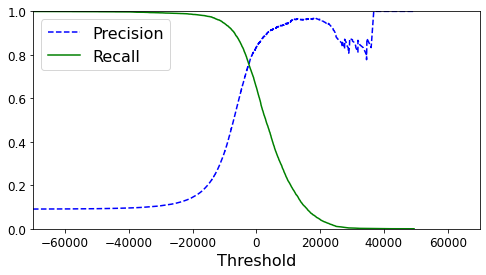

In [71]:
#Scores of all the data
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")
from sklearn.metrics import precision_recall_curve #presicion and racall values for each threshold
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    plt.xlim([-70000, 70000])
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

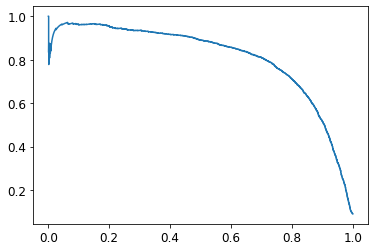

In [72]:
#as one goes up the other goes down
plt.plot(recalls[:-1], precisions[:-1])

In [85]:
#threshold for a given precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.85)]
threshold_90_precision

594.228034424111

In [86]:
# New guesser with 90% precision
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90),recall_score(y_train_5, y_train_pred_90))

0.8500380614057346 0.6179671647297547


In [100]:
#Rates of true/false positives/negatives
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

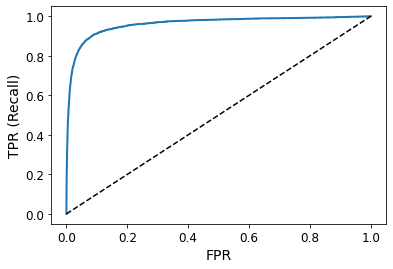

In [108]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')# Dashed diagonal
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
plot_roc_curve(fpr, tpr)
plt.show()


In [109]:
# The area under this graph represents the quality of the classifier, the closer to 0.5 (dotted line) the worst (random) the results, closer to 1, better results

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.9604938554008616

In [119]:
#Now, lets make a decision tree (Random Forest) for this problem, as it is a classification problem. And copare it to this Classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba") #Random Forests do not have thresholds, instead they have a predict probability, 
#that returns the probability of the image being or no a '5' in this case

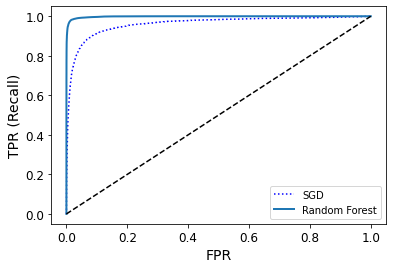

0.9983436731328145

In [117]:
# As we can see, the Random Forest method is supperior than the SGD one, as it has a area closer to 1
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
roc_auc_score(y_train_5, y_scores_forest)

In [121]:
# As well as a higher precision and recall
YP = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(precision_score(y_train_5, YP),recall_score(y_train_5, YP))

0.9905083315756169 0.8662608374838591


In [122]:
# CLASSIFING ALL THE NUMBERS, NOT JUST THE 5s
# Usually it is used the SGD, Random Forests and naive Bayes Classifiers for Multiclass classification
# Altough it is possible to use several binariary classifier (such as the one we just made), one for each digit and take the highest score at the end
# We are trying here the Support Vector Machine (SVC), a binary classifier
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [133]:
# Visual test
for n in range(10):
    print (svm_clf.predict([X_train[n]]), y_train[n])

[5] 5
[0] 0
[4] 4
[1] 1
[9] 9
[2] 2
[1] 1
[3] 3
[1] 1
[4] 4


In [134]:
# Scores for each possible value of X0
x0score = svm_clf.decision_function([X[0]])

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [135]:
# SGD CLASSIFIER
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[0]])

array([3], dtype=uint8)

In [141]:
# Accuracy, although this is lower than the 5-detector, it is a better result, as it can correctly predict the results (of all numbers) around 87%, that is way higher than a random detector (10%)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [150]:
for n in range(20):
    print(np.argmax(sgd_clf.decision_function([X_train[n]])), y_train[n])

3 5
0 0
4 4
1 1
9 9
2 2
1 1
3 3
1 1
4 4
3 3
5 5
3 3
6 6
1 1
7 7
2 2
8 8
6 6
9 9


In [151]:
#We can also improve (by a little) the SGD's accuracy by normalizing our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [152]:
# CONFUSION MATRIX
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

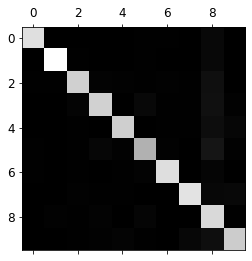

In [153]:
# Making it prettier/more visual
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [154]:
# Modifing the matrix to make the errors more evident
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

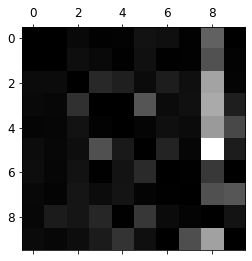

In [161]:
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0) # filling the diagonal with 0s to make the errors brighter
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show() #we can see that a lot of numbers get missclassified as 8, also 3 and 5 are usually mistaken by each other

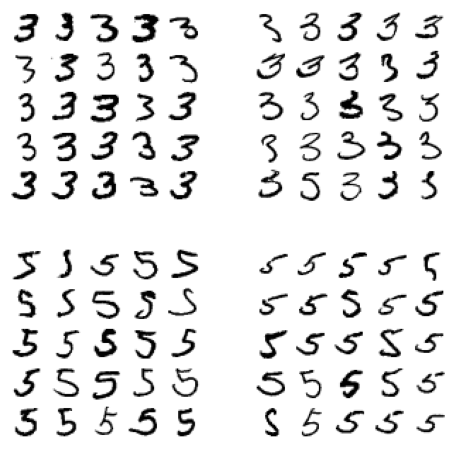

In [163]:
# Confusion between 3 and 5:
X33 = X_train[(y_train == 3) & (y_train_pred == 3)]
X35 = X_train[(y_train == 3) & (y_train_pred == 5)]
X53 = X_train[(y_train == 5) & (y_train_pred == 3)]
X55 = X_train[(y_train == 5) & (y_train_pred == 5)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X33[:25], images_per_row=5)
plt.subplot(222); plot_digits(X35[:25], images_per_row=5)
plt.subplot(223); plot_digits(X53[:25], images_per_row=5)
plt.subplot(224); plot_digits(X55[:25], images_per_row=5)
plt.show()


In [9]:
# USING THE KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [165]:
for n in range(20):
    print(kn_clf.predict([X_train[n]]), y_train[n])

[5] 5
[0] 0
[4] 4
[1] 1
[9] 9
[2] 2
[1] 1
[3] 3
[1] 1
[4] 4
[3] 3
[5] 5
[3] 3
[6] 6
[1] 1
[7] 7
[2] 2
[8] 8
[6] 6
[9] 9


In [166]:
cross_val_score(kn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [167]:
# Optimizing the Classifier results

from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors': [3,5,11,19], 'weights': ['uniform', 'distance']} #parameters to test
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1) #optimizing the classifier
gs_results = gs.fit(X_train, y_train) #get the best parameter for this data

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 81.5min remaining: 27.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 81.9min finished


In [169]:
print(gs_results.best_estimator_, gs_results.best_score_, gs_results.best_params_)

KNeighborsClassifier(n_neighbors=3, weights='distance') 0.9693333333333333 {'n_neighbors': 3, 'weights': 'distance'}


In [171]:
kn_clfn=KNeighborsClassifier(n_neighbors = 4,weights = 'distance', n_jobs=-1)
kn_clfn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [177]:
cross_val_score(kn_clfn, X_test, y_test, cv=3, scoring="accuracy", n_jobs=-1)

array([0.91841632, 0.9429943 , 0.96189619])

In [14]:
# Increasing the number of pictures by shifting each

from scipy.ndimage.interpolation import shift
#shifting images by dx in x and dy in y
def shift_image(image,dx,dy):
    image=image.reshape((28,28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])
#creating a new data set from the old one
newX_train = [image for image in X_train]
newy_train = [image for image in y_train]
#adding the shifhted pictures into the new one
for dx,dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image, label in zip(X_train, y_train):
        newX_train.append(shift_image(image, dx, dy))
        newy_train.append(label)

newX_train = np.array(newX_train)
newy_train = np.array(newy_train)

In [15]:
kn_clfn=KNeighborsClassifier(n_neighbors = 4,weights = 'distance', n_jobs=-1)
kn_clfn.fit(newX_train, newy_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [17]:
y_pred = kn_clfn.predict(X_test)

NameError: name 'accuracy_score' is not defined

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9763